## Initialization

Note: a good initialization will help learning
* Speed up the convergence of gradient descent
* Increase the odds of gradient descent converging to a lower training(and generalization)

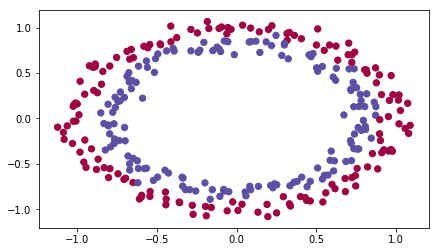

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()



## 1 - Neural Network model


* Zero initialization -- setting initialization = "zeros" in the input argument
* Random initialization -- setting initialization = "random" in the input argument.
* He initialization -- setting initialization = "he" in the input argument (GOOD FOR RELU)
    -> kind of like an improvement from Xavier
    




In [4]:
def model(X, Y, learning_rate = 0.01, 
          num_iterations=15000, print_cost=True, initialization="he"):
    """
    3-layer: (Linear->relu linear->relu linear->sigmoid)
    Arguments:
    X -- input data shape(2, number of examples)
    Y -- true "label" vector 0-blue 1-red shape(1, # examples)
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use("zeros", "random" or "he")
    
    Return:
    parameter : dict struct
    
    """
    
    grads = {}
    costs = []
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1] # 2nd: 10 3rd: 5 final: 1
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
        
    # Loop (gradient descent)
    
    for i in range(0, num_iterations):
        #Forward prop
        a3, cache = forward_propagation(X, parameters)
        
        #Loss
        cost = compute_loss(a3, Y)
        
        #Backward Prop
        grads = backward_propagation(X, Y, cache)
        
        #Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
        # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
        
    return parameters

## 2- Zero initialization

Two types of parameters to initialize a neural network:

* the weight matrices
* the bias vectors

In [5]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1" etc
    """
    
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters
    

In [6]:
parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[ 0.  0.]]
b2 = [[ 0.]]


### Try out the iteration using zero initialize

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


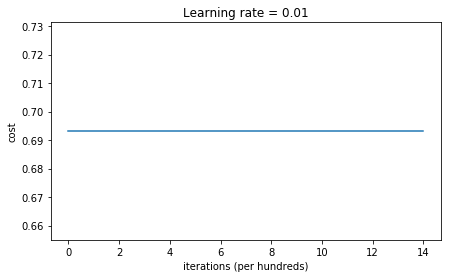

train set:
Accuracy: 0.5
on the test set:
Accuracy: 0.5


In [7]:
parameters = model(train_X, train_Y, initialization = "zeros")
print("train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("on the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Performance -- really bad
see the details of predictions and decision boundary

In [8]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


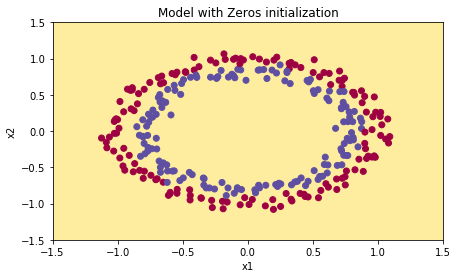

In [9]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])

# lambda ??
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Basically, the model is predicting 0 for every signal example

-> initialize to zero results in every unit learn the same thing(symmetry)

-> so it's like linear/ logistic regression


## 3 - Random Initialization

break symmetry

In [18]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer
    
    Returns:
    parameters -- python dict struct
    """
    
    np.random.seed(3)
    
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

In [19]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[ 0.]
 [ 0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[ 0.]]


/home/jovyan/work/week5/Initialization/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/jovyan/work/week5/Initialization/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6242434241539614
Cost after iteration 2000: 0.5978811277755388
Cost after iteration 3000: 0.5636242569764779
Cost after iteration 4000: 0.5500958254523324
Cost after iteration 5000: 0.544339206192789
Cost after iteration 6000: 0.5373584514307651
Cost after iteration 7000: 0.469574666760224
Cost after iteration 8000: 0.39766324943219844
Cost after iteration 9000: 0.3934423376823982
Cost after iteration 10000: 0.3920158992175907
Cost after iteration 11000: 0.38913979237487845
Cost after iteration 12000: 0.3861261344766218
Cost after iteration 13000: 0.3849694511273874
Cost after iteration 14000: 0.3827489017191917


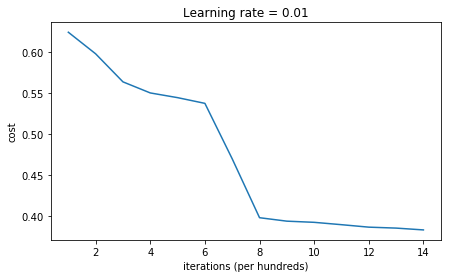

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [20]:

parameters = model(train_X, train_Y, initialization = "random")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [21]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1
  1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
  0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1
  1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0
  1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
  0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
  1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1
  1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
  1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


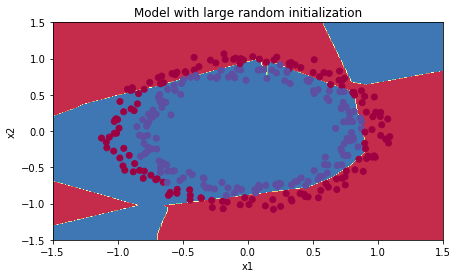

In [25]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])

plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Remarks:
* cost starts very high -> large random-valued weights, the last activation(sigmoid) outputs results close to 0 or 1 for some examples, when (loga[3]) = log(0), the cost goes to infinity
* Poor initialization can lead to vanishing/exploding gradients
* If you train this network longer you'll see better results


* Initializing weights to very large random values does not work well
* P: how small should the random values be? 

## 4- He initialization

In [ ]:
##To be continued